# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I **Team_JM1**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

---

<figure>
<img src="climate_change.jpg" width="800px">
    <figcaption><p text_align = "center">

### Climate Change
Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.

The rapid climate change we are now seeing is caused by humans using oil, gas and coal for their homes, factories and transport.

When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. Our company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of predicting tweets;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="UOUYhOBT87Sbsbc0BSahH0VZ5",
    project_name="Advance Classification",
    workspace="emmzytamara",
    log_code = True
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/emmzytamara/advance-classification/31899bf150ee4e6fa1897f5f6341d582



In [29]:
#import nltk
#nltk.download()


In [30]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**2.1 Brief description of the data**

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description**

>2 News: the tweet links to factual news about climate change

>1 Pro: the tweet supports the belief of man-made climate change

>0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

>-1 Anti: the tweet does not believe in man-made climate change

**Variable definitions**

>sentiment: Sentiment of tweet

>message: Tweet body

>tweetid: Twitter unique id

In [31]:
# load the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
samplesubmission = pd.read_csv('data/sample_submission.csv')

# Preview train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [14]:
# Preview train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [17]:
# Preview train dataset
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In this section train, test and samplesubmission data have been uploaded to have a snap shot of how the data looks like. The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data. The sample submission file will aid in uploading the model in Kaggle.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Exploratory Data Analysis
>>>*What is Exploratory data analysis?*

>>>Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. 

>>>*Why is conducting EDA important?*

>>>It aids in determining how best to manipulate data to get the required answers, expose trends, patterns, and relationships that are not readily apparent i.e. get insights into the dataset.

>>>*How is EDA conducted?*

EDA can be conducted in the following ways:
- **Univariate**:- \
    i. **non-graphical**:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.\
    ii. **graphical**:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.
- **Multivariate**:-  \
    i. **non-graphical**:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics. \
    ii. **graphical**:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### 3.2 Univariate Non-Graphical Analysis
>For this analysis, we are going to view dataset on the below checks:  \
    >>i.  Check for the presence of *null* values  \
    >>ii. Descriptive statistical values *mean, std, minimum, quatiles, maximum, and kurtosis*  
    >>iii. Dataset data types

In [18]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset has 3 features namely sentiment, message, tweetid. The features have 15819 entries and they have no missing values. The message feature has an object datetype i.e. that the features has mixed data types(numbers and strings).  

In [19]:
# look at data statistics
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This confirms that the dataset features have no missing values.

 **Descriptive Statistics**

>Descriptive statistics summarize the data by computing mean, median, mode, standard deviation likewise.descriptive statistics describe the dataset in a way simpler manner through;

*   The measure of central tendency 
>*  Mean:- The average value 
>*  Median:- The mid point value 
>*  Mode:- The most common value

*   Measure of spread  
>* Percentiles:- Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.
>* standard deviation:-a number that describes how spread out the values are.
*  Measure of symmetry 
>* Skewness:- a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
>>* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
>>* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
>>* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 
*  Measure of Peakedness 
>* Kurtosis:-  a measure of relative peakedness of a probability distribution, or alternatively how heavy or how light its tails are. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).
>>








In [20]:
# look at data statistics
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sentiment,15819.0,NaN,NaN,NaN,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
message,15819,14229,RT @StephenSchlegel: she's thinking about how ...,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweetid,15819.0,NaN,NaN,NaN,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [21]:
df_train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

From the above analysis thus far, it is evidence that we only have two numeric colunms. 
However we suspect that one of these columns(tweetid) contains unique values in each row, while the other column(sentiment) from the name, we infere that it is our label, hence contains a minimum of two different values.

>To confirm the above, we write a function that takes in a dataframe and a column-id, to give an output which is the number of unique values in the column as an integer.

In [22]:
def unique_val(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs an interger, which is the number of unique 
        values in the column.
    """
    return df[col].nunique()

In [23]:
# Check the numbers of unique values for the sentiment column
print(f'The numbers of unique values in the sentiment column is : {unique_val(df_train, "sentiment")}')

The numbers of unique values in the sentiment column is : 4


In [24]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

From the codes above the sentiment feature has four unique values. Most observations are pro climate change indicated by 1. There is also an indication of class imbalance i.e. the number of observations across the classes(1,2,0,-1) is unevenly distributed.

### 3.3 Univariate graphical inspection of data
>For this analysis, we view the individual colunms using histogram plot.

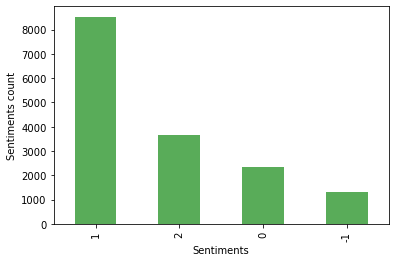

In [25]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['sentiment'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Sentiments count')
plt.show()

### 3.4 Put in Word Cloud Below

In [26]:
# Create new dataframe for word cloud
df_train_cloud = df_train.copy()
df_train_cloud.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The use of preprocessed data in Word Cloud makes it easy to identify the relevant words as opposed to many instances of https and other types of noise. 

In [27]:
# Preproceessing functions
def preprocess_tweet(df, col):
    """ Functions takes in a pandas dataframe and performs a series of steps on 
        the tweet/message/text column"""
    # Converting the whole text to lowercase
    df[col] = df[col]. apply(lambda x: x.lower())

    # Removing the twitter usernames from tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'http\S+', ' ', x))

    # Deleting everything that is not characters
    df[col] = df[col]. apply(lambda x: re.sub(r'[^a-z A-Z]', ' ', x))

    # Deleting any word which is less than 3-characters mostly those are stopwords
    df[col] = df[col]. apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

    # Stripping extra spaces in the text
    df[col] = df[col]. apply(lambda x: re.sub(r' +', ' ', x))
    
    return df

preprocess_tweet(df_train_cloud, 'message')

df_train_cloud.head()




,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn think carbon diox...,625221
1,1,not like lack evidence anthropogenic global w...,126103
2,2,researchers say have three years act climate ...,698562
3,1,todayinmaker wired was pivotal year the war c...,573736
4,1,and racist sexist climate change denying bigo...,466954


(-0.5, 399.5, 199.5, -0.5)

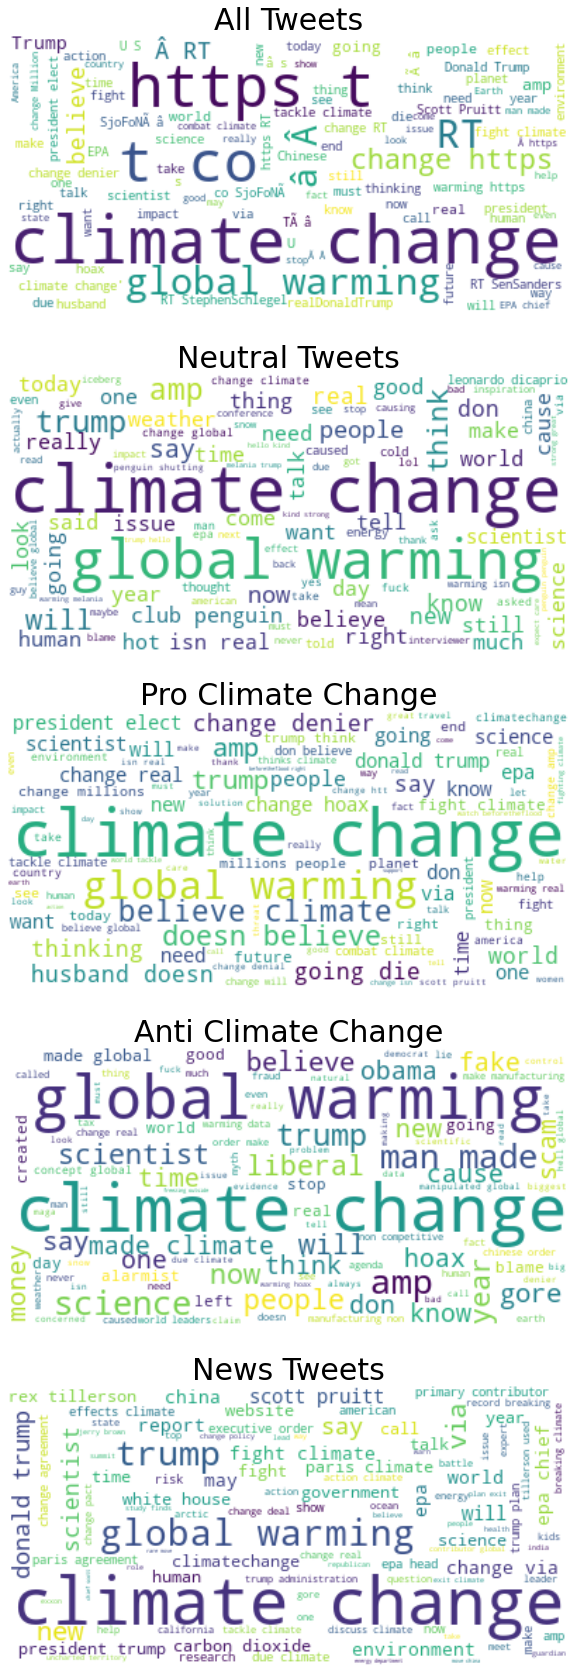

In [28]:
# Create DataFrame for Each Sentiment
df_sent1 = df_train_cloud[df_train_cloud['sentiment']==1]
df_sent0 = df_train_cloud[df_train_cloud['sentiment']==0]
df_sentneg = df_train_cloud[df_train_cloud['sentiment']==-1]
df_sent2 = df_train_cloud[df_train_cloud['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:

- Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change.
- The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model.
- There is a need to reduce the categories in sentiment feature because the goal is to define whethere there is a positive sentiment or not.

### 3.5 Key Insights from EDA
>* The tweets contain punctuation marks and web urls.
>* The tweet text is in mixed case version i.e. both lower and uppercase.
>* The dataset contains three columns (sentiments, message and tweetid)
>* Sentiments and tweetid are of numeric data type, while message is non-numeric
>*Tweetid is a column with uniques values across the entire rows of the dataset
>* Sentiments columns contains for different unique class (-1, 0, 1 &2) with different sizes.
>* The is uneven distribution of observations among the classes in the sentiment column.

### 3.6 What's next?
Based on the insights from EDA the following steps will be executed in the data engineering section:-

>* Creation of new features to inform text preprocessing
>* Text preprocessing will be done as follows:-
>>* Text cleaning
>>* Tokenization
>>* Stemming
>>* Lemmatization
>>* Bag of words